<h1>ENB2: Feed forward models</h1>

In [1]:
import numpy as np
import tensorflow as tf
import os
import csv
import matplotlib.pyplot as plt
from keras import models
from keras import layers

C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\s

In [2]:
import pre_process as pp

In [3]:
data, labels = pp.pre_process()

concatenating files
AReMv1\bending1\dataset1.csv
AReMv1\bending1\dataset2.csv
AReMv1\bending1\dataset3.csv
AReMv1\bending1\dataset4.csv
AReMv1\bending1\dataset5.csv
AReMv1\bending1\dataset6.csv
AReMv1\bending1\dataset7.csv
AReMv1\bending2\dataset1.csv
AReMv1\bending2\dataset2.csv
AReMv1\bending2\dataset3.csv
AReMv1\bending2\dataset5.csv
AReMv1\bending2\dataset6.csv
AReMv1\cycling\dataset1.csv
AReMv1\cycling\dataset10.csv
AReMv1\cycling\dataset11.csv
AReMv1\cycling\dataset12.csv
AReMv1\cycling\dataset13.csv
AReMv1\cycling\dataset14.csv
AReMv1\cycling\dataset15.csv
AReMv1\cycling\dataset2.csv
AReMv1\cycling\dataset3.csv
AReMv1\cycling\dataset4.csv
AReMv1\cycling\dataset5.csv
AReMv1\cycling\dataset6.csv
AReMv1\cycling\dataset7.csv
AReMv1\cycling\dataset8.csv
AReMv1\cycling\dataset9.csv
AReMv1\lying\dataset1.csv
AReMv1\lying\dataset10.csv
AReMv1\lying\dataset11.csv
AReMv1\lying\dataset12.csv
AReMv1\lying\dataset13.csv
AReMv1\lying\dataset14.csv
AReMv1\lying\dataset15.csv
AReMv1\lying\datas

<h2>Network 2a</h2>

In [4]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.shuffle_split(data, labels)

In [34]:
net2a = models.Sequential()
net2a.add(layers.Dense(480, input_shape = (480,6)))
net2a.add(layers.Dense (960, activation = 'relu'))
net2a.add(layers.Dense (480, activation = 'relu'))
net2a.add(layers.Dense (240, activation = 'relu'))
net2a.add(layers.Flatten())
net2a.add(layers.Dense(7, activation = 'sigmoid'))

net2a.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_25 (Dense)             (None, 480, 960)          461760    
_________________________________________________________________
dense_26 (Dense)             (None, 480, 480)          461280    
_________________________________________________________________
dense_27 (Dense)             (None, 480, 240)          115440    
_________________________________________________________________
flatten_6 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 7)                 806407    
Total params: 1,848,247
Trainable params: 1,848,247
Non-trainable params: 0
____________________________________________

As per enb1 I will be using the adam optimizer, enb1 suggested that 10 epochs would be sufficient but I go with 20 for now.

In [35]:
net2a.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2a = net2a.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 2s 34ms/step - loss: 2.0003 - accuracy: 0.0816 - val_loss: 1.9019 - val_accuracy: 0.1053
Epoch 2/11
49/49 [==============================] - 1s 26ms/step - loss: 1.8831 - accuracy: 0.2245 - val_loss: 1.7958 - val_accuracy: 0.2632
Epoch 3/11
49/49 [==============================] - 1s 26ms/step - loss: 1.7899 - accuracy: 0.4082 - val_loss: 1.6165 - val_accuracy: 0.2632
Epoch 4/11
49/49 [==============================] - 1s 26ms/step - loss: 1.5804 - accuracy: 0.4082 - val_loss: 1.5092 - val_accuracy: 0.2632
Epoch 5/11
49/49 [==============================] - 1s 28ms/step - loss: 1.4727 - accuracy: 0.4898 - val_loss: 1.6026 - val_accuracy: 0.2632
Epoch 6/11
49/49 [==============================] - 1s 28ms/step - loss: 1.2609 - accuracy: 0.4082 - val_loss: 1.4037 - val_accuracy: 0.2632
Epoch 7/11
49/49 [==============================] - 1s 26ms/step - loss: 1.0830 - accuracy: 0.4898 - val_loss:

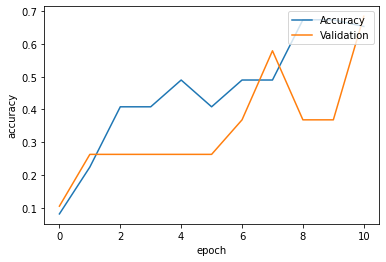

In [36]:
plt.plot(history2a.history['accuracy'])
plt.plot(history2a.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

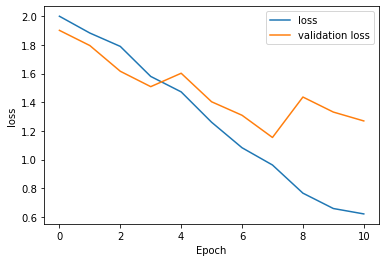

In [37]:
plt.plot(history2a.history['loss'])
plt.plot(history2a.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [38]:
#test_train_data = np.concatenate((train_data, val_data), axis=0)
#test_train_labels = np.concatenate((train_labels, val_labels), axis=0)
#print(np.shape(test_train_data))
#print(np.shape(test_train_labels))

In [39]:
#net2a.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#history2a = net2a.fit(test_train_data, test_train_labels, epochs = 11)

In [40]:
net2a.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 7ms/step


[0.7585339546203613, 0.47058823704719543]

net 2a gives 47% accuracy, which is not great.

<h2> net2b</h2>

In [43]:
#train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.shuffle_split(data, labels)

In [41]:
net2b = models.Sequential()
net2b.add(layers.Dense(480, input_shape = (480,6)))
net2b.add(layers.Dense (480, activation = 'relu'))
net2b.add(layers.Dense (240, activation = 'relu'))
net2b.add(layers.Flatten())
net2b.add(layers.Dense(7, activation = 'sigmoid'))

net2b.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_30 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
dense_31 (Dense)             (None, 480, 240)          115440    
_________________________________________________________________
flatten_7 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_32 (Dense)             (None, 7)                 806407    
Total params: 1,156,087
Trainable params: 1,156,087
Non-trainable params: 0
_________________________________________________________________


In [42]:
net2b.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2b = net2b.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 17ms/step - loss: 2.0467 - accuracy: 0.1224 - val_loss: 1.8756 - val_accuracy: 0.2105
Epoch 2/11
49/49 [==============================] - 0s 9ms/step - loss: 1.8227 - accuracy: 0.3469 - val_loss: 1.7821 - val_accuracy: 0.2632
Epoch 3/11
49/49 [==============================] - 0s 8ms/step - loss: 1.7864 - accuracy: 0.2857 - val_loss: 1.6526 - val_accuracy: 0.3684
Epoch 4/11
49/49 [==============================] - 0s 10ms/step - loss: 1.6381 - accuracy: 0.4286 - val_loss: 1.5733 - val_accuracy: 0.2632
Epoch 5/11
49/49 [==============================] - 0s 10ms/step - loss: 1.4356 - accuracy: 0.4082 - val_loss: 1.4171 - val_accuracy: 0.3158
Epoch 6/11
49/49 [==============================] - 0s 10ms/step - loss: 1.1917 - accuracy: 0.5102 - val_loss: 1.2116 - val_accuracy: 0.5263
Epoch 7/11
49/49 [==============================] - 1s 10ms/step - loss: 1.0196 - accuracy: 0.6531 - val_loss: 1

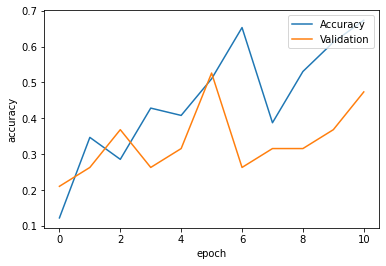

In [43]:
plt.plot(history2b.history['accuracy'])
plt.plot(history2b.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

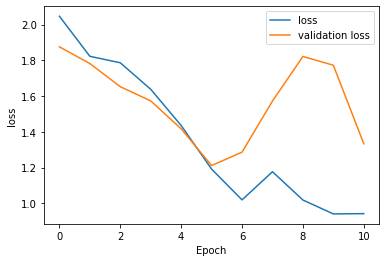

In [44]:
plt.plot(history2b.history['loss'])
plt.plot(history2b.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [45]:
#test_train_data = np.concatenate((train_data, val_data), axis=0)
#test_train_labels = np.concatenate((train_labels, val_labels), axis=0)
#print(np.shape(test_train_data))
#print(np.shape(test_train_labels))

In [46]:
#net2b.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#history2b = net2b.fit(test_train_data, test_train_labels, epochs = 11)

In [47]:
net2b.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 4ms/step


[0.9155793786048889, 0.7058823704719543]

Accuracy = 70%

<h2> net2c</h2>

In [48]:
#train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.shuffle_split(data, labels)

In [49]:
net2c = models.Sequential()
net2c.add(layers.Dense(480, input_shape = (480,6)))
net2c.add(layers.Dense (960, activation = 'relu'))
net2c.add(layers.Dense (960, activation = 'relu'))
net2c.add(layers.Dense (480, activation = 'relu'))
net2c.add(layers.Flatten())
net2c.add(layers.Dense(7, activation = 'sigmoid'))

net2c.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_34 (Dense)             (None, 480, 960)          461760    
_________________________________________________________________
dense_35 (Dense)             (None, 480, 960)          922560    
_________________________________________________________________
dense_36 (Dense)             (None, 480, 480)          461280    
_________________________________________________________________
flatten_8 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_37 (Dense)             (None, 7)                 1612807   
Total params: 3,461,767
Trainable params: 3,461,767
Non-trainable params: 0
____________________________________________

In [50]:
net2c.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2c = net2c.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 3s 54ms/step - loss: 2.1069 - accuracy: 0.1429 - val_loss: 1.8619 - val_accuracy: 0.1579
Epoch 2/11
49/49 [==============================] - 2s 40ms/step - loss: 1.8478 - accuracy: 0.2041 - val_loss: 1.7552 - val_accuracy: 0.1053
Epoch 3/11
49/49 [==============================] - 2s 48ms/step - loss: 1.6962 - accuracy: 0.2653 - val_loss: 1.9710 - val_accuracy: 0.1053
Epoch 4/11
49/49 [==============================] - 2s 47ms/step - loss: 1.8020 - accuracy: 0.2653 - val_loss: 1.6272 - val_accuracy: 0.3158
Epoch 5/11
49/49 [==============================] - 2s 47ms/step - loss: 1.6432 - accuracy: 0.3469 - val_loss: 1.5367 - val_accuracy: 0.2632
Epoch 6/11
49/49 [==============================] - 2s 49ms/step - loss: 1.3555 - accuracy: 0.4286 - val_loss: 1.4814 - val_accuracy: 0.3158
Epoch 7/11
49/49 [==============================] - 2s 45ms/step - loss: 1.1620 - accuracy: 0.5918 - val_loss:

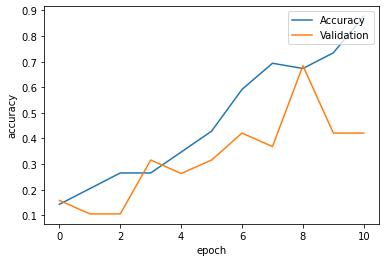

In [51]:
plt.plot(history2c.history['accuracy'])
plt.plot(history2c.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

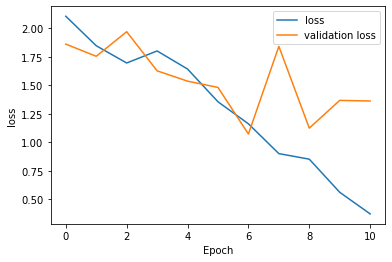

In [52]:
plt.plot(history2c.history['loss'])
plt.plot(history2c.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [53]:
#test_train_data = np.concatenate((train_data, val_data), axis=0)
#test_train_labels = np.concatenate((train_labels, val_labels), axis=0)
#print(np.shape(test_train_data))
#print(np.shape(test_train_labels))

In [54]:
#net2c.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#history2c = net2c.fit(test_train_data, test_train_labels, epochs = 11)

In [55]:
net2c.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 11ms/step


[0.7845569849014282, 0.529411792755127]

52% accuracy

<h1> net2d</h1>

In [56]:
net2d = models.Sequential()
net2d.add(layers.Dense(480, input_shape = (480,6)))
net2d.add(layers.Dense (480, activation = 'relu'))
net2d.add(layers.Flatten())
net2d.add(layers.Dense(7, activation = 'sigmoid'))

net2d.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_39 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
flatten_9 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_40 (Dense)             (None, 7)                 1612807   
Total params: 1,847,047
Trainable params: 1,847,047
Non-trainable params: 0
_________________________________________________________________


In [57]:
net2d.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2d = net2d.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 13ms/step - loss: 2.1965 - accuracy: 0.1429 - val_loss: 1.8282 - val_accuracy: 0.1579
Epoch 2/11
49/49 [==============================] - 0s 7ms/step - loss: 1.8703 - accuracy: 0.2041 - val_loss: 1.7858 - val_accuracy: 0.2632
Epoch 3/11
49/49 [==============================] - 0s 7ms/step - loss: 1.7894 - accuracy: 0.3878 - val_loss: 1.6042 - val_accuracy: 0.3684
Epoch 4/11
49/49 [==============================] - 0s 7ms/step - loss: 1.5026 - accuracy: 0.5918 - val_loss: 1.4696 - val_accuracy: 0.3158
Epoch 5/11
49/49 [==============================] - 0s 7ms/step - loss: 1.1743 - accuracy: 0.6122 - val_loss: 1.2586 - val_accuracy: 0.3158
Epoch 6/11
49/49 [==============================] - 0s 8ms/step - loss: 0.9270 - accuracy: 0.6735 - val_loss: 1.3044 - val_accuracy: 0.2632
Epoch 7/11
49/49 [==============================] - 0s 7ms/step - loss: 0.7132 - accuracy: 0.6327 - val_loss: 1.409

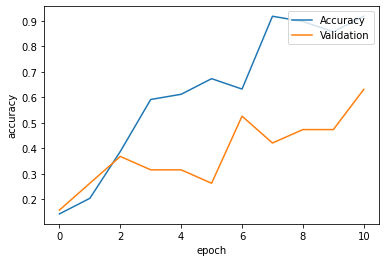

In [58]:
plt.plot(history2d.history['accuracy'])
plt.plot(history2d.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

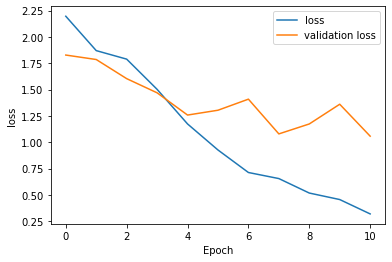

In [59]:
plt.plot(history2d.history['loss'])
plt.plot(history2d.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [60]:
net2d.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 2ms/step


[0.5245867967605591, 0.6470588445663452]

<h3>65% acc</h3>

<h1>net2e</h1>

In [71]:
net2e = models.Sequential()
net2e.add(layers.Dense(480, input_shape = (480,6)))
net2e.add(layers.Dense (480, activation = 'relu'))
net2e.add(layers.Dense (480, activation = 'relu'))
net2e.add(layers.Flatten())
net2e.add(layers.Dense(7, activation = 'sigmoid'))

net2e.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_54 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
dense_55 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
flatten_14 (Flatten)         (None, 230400)            0         
_________________________________________________________________
dense_56 (Dense)             (None, 7)                 1612807   
Total params: 2,077,927
Trainable params: 2,077,927
Non-trainable params: 0
_________________________________________________________________


In [72]:
net2e.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2e = net2e.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 20ms/step - loss: 2.2478 - accuracy: 0.1020 - val_loss: 1.9017 - val_accuracy: 0.1579
Epoch 2/11
49/49 [==============================] - 1s 12ms/step - loss: 1.8563 - accuracy: 0.2245 - val_loss: 1.8229 - val_accuracy: 0.2632
Epoch 3/11
49/49 [==============================] - 1s 11ms/step - loss: 1.7330 - accuracy: 0.4286 - val_loss: 1.5344 - val_accuracy: 0.2105
Epoch 4/11
49/49 [==============================] - 1s 11ms/step - loss: 1.4619 - accuracy: 0.3878 - val_loss: 1.4383 - val_accuracy: 0.2632
Epoch 5/11
49/49 [==============================] - 1s 11ms/step - loss: 1.1493 - accuracy: 0.4082 - val_loss: 1.2782 - val_accuracy: 0.2632
Epoch 6/11
49/49 [==============================] - 1s 13ms/step - loss: 0.9235 - accuracy: 0.5306 - val_loss: 1.2333 - val_accuracy: 0.4737
Epoch 7/11
49/49 [==============================] - 1s 12ms/step - loss: 0.6948 - accuracy: 0.7755 - val_loss:

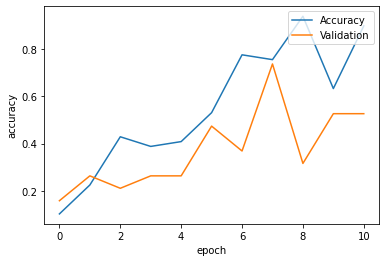

In [73]:
plt.plot(history2e.history['accuracy'])
plt.plot(history2e.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

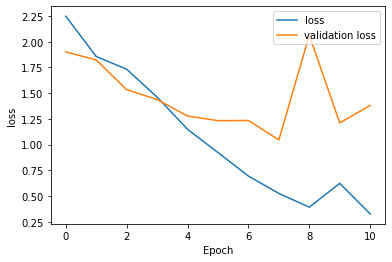

In [74]:
plt.plot(history2e.history['loss'])
plt.plot(history2e.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [75]:
net2e.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 3ms/step


[0.6406550407409668, 0.7058823704719543]

<h2>71% accuracy</h2>

<h1>net2f</h1>

In [76]:
net2f = models.Sequential()
net2f.add(layers.Dense(480, input_shape = (480,6)))
net2f.add(layers.Dense (480, activation = 'relu'))
net2f.add(layers.Dense (480, activation = 'relu'))
net2f.add(layers.Dense (480, activation = 'relu'))
net2f.add(layers.Flatten())
net2f.add(layers.Dense(7, activation = 'sigmoid'))

net2f.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_58 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
dense_59 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
dense_60 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
flatten_15 (Flatten)         (None, 230400)            0         
_________________________________________________________________
dense_61 (Dense)             (None, 7)                 1612807   
Total params: 2,308,807
Trainable params: 2,308,807
Non-trainable params: 0
___________________________________________

In [77]:
net2f.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2f = net2f.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 28ms/step - loss: 2.0592 - accuracy: 0.1837 - val_loss: 1.8493 - val_accuracy: 0.2632
Epoch 2/11
49/49 [==============================] - 1s 19ms/step - loss: 1.8110 - accuracy: 0.3265 - val_loss: 1.6874 - val_accuracy: 0.2632
Epoch 3/11
49/49 [==============================] - 1s 19ms/step - loss: 1.5972 - accuracy: 0.4286 - val_loss: 1.6186 - val_accuracy: 0.1579
Epoch 4/11
49/49 [==============================] - 1s 19ms/step - loss: 1.4343 - accuracy: 0.3265 - val_loss: 1.3366 - val_accuracy: 0.3684
Epoch 5/11
49/49 [==============================] - 1s 18ms/step - loss: 1.1505 - accuracy: 0.5714 - val_loss: 1.4259 - val_accuracy: 0.3684
Epoch 6/11
49/49 [==============================] - 1s 18ms/step - loss: 1.0632 - accuracy: 0.6735 - val_loss: 1.5480 - val_accuracy: 0.3684
Epoch 7/11
49/49 [==============================] - 1s 17ms/step - loss: 1.0462 - accuracy: 0.4694 - val_loss:

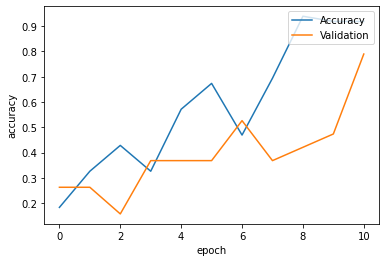

In [78]:
plt.plot(history2f.history['accuracy'])
plt.plot(history2f.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

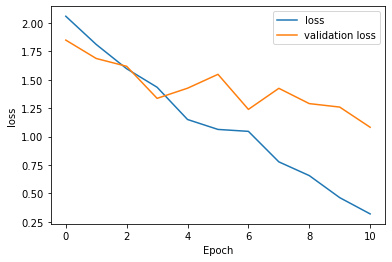

In [79]:
plt.plot(history2f.history['loss'])
plt.plot(history2f.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [80]:
net2f.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 6ms/step


[0.5633540749549866, 0.8235294222831726]

<h2> 82% accuracy</h2>

<h1>net2g</h1>

In [5]:
net2g = models.Sequential()
net2g.add(layers.Dense(480, input_shape = (480,6)))
net2g.add(layers.Dense (480, activation = 'relu'))
net2g.add(layers.Dense (240, activation = 'relu'))
net2g.add(layers.Dense (120, activation = 'relu'))
net2g.add(layers.Flatten())
net2g.add(layers.Dense(7, activation = 'sigmoid'))

net2g.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
dense_2 (Dense)              (None, 480, 480)          230880    
_________________________________________________________________
dense_3 (Dense)              (None, 480, 240)          115440    
_________________________________________________________________
dense_4 (Dense)              (None, 480, 120)          28920     
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 403207    
Total params: 781,807
Trainable params: 781,807
Non-trainable params: 0
________________________________________________

In [6]:
net2g.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2g = net2g.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 18ms/step - loss: 1.9378 - accuracy: 0.1020 - val_loss: 1.8997 - val_accuracy: 0.2105
Epoch 2/11
49/49 [==============================] - 0s 9ms/step - loss: 1.8032 - accuracy: 0.1837 - val_loss: 1.8663 - val_accuracy: 0.2632
Epoch 3/11
49/49 [==============================] - 0s 9ms/step - loss: 1.7160 - accuracy: 0.3673 - val_loss: 1.7590 - val_accuracy: 0.1053
Epoch 4/11
49/49 [==============================] - 0s 10ms/step - loss: 1.5936 - accuracy: 0.3878 - val_loss: 1.6443 - val_accuracy: 0.2105
Epoch 5/11
49/49 [==============================] - 0s 10ms/step - loss: 1.3787 - accuracy: 0.3878 - val_loss: 1.5409 - val_accuracy: 0.1579
Epoch 6/11
49/49 [==============================] - 1s 11ms/step - loss: 1.1977 - accuracy: 0.4286 - val_loss: 1.5139 - val_accuracy: 0.2632
Epoch 7/11
49/49 

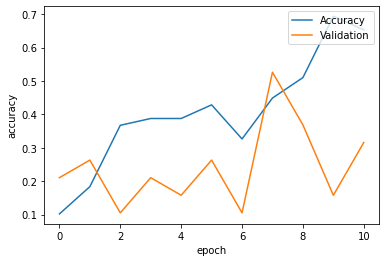

In [7]:
plt.plot(history2g.history['accuracy'])
plt.plot(history2g.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

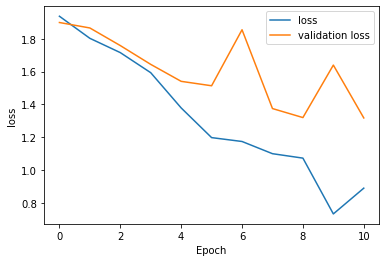

In [8]:
plt.plot(history2g.history['loss'])
plt.plot(history2g.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [9]:
net2g.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 5ms/step


[1.2613210678100586, 0.29411765933036804]

<h1>net2H</h1>

In [10]:
net2h = models.Sequential()
net2h.add(layers.Dense(480, input_shape = (480,6)))
net2h.add(layers.Dense (960, activation = 'relu'))
net2h.add(layers.Dense (480, activation = 'relu'))
net2h.add(layers.Flatten())
net2h.add(layers.Dense(7, activation = 'sigmoid'))

net2h.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 480, 480)          3360      
_________________________________________________________________
dense_7 (Dense)              (None, 480, 960)          461760    
_________________________________________________________________
dense_8 (Dense)              (None, 480, 480)          461280    
_________________________________________________________________
flatten_2 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 1612807   
Total params: 2,539,207
Trainable params: 2,539,207
Non-trainable params: 0
_________________________________________________________________


In [11]:
net2h.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2h = net2h.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 2s 31ms/step - loss: 2.0895 - accuracy: 0.2857 - val_loss: 1.9410 - val_accuracy: 0.1579
Epoch 2/11
49/49 [==============================] - 1s 24ms/step - loss: 1.7490 - accuracy: 0.2245 - val_loss: 1.8039 - val_accuracy: 0.2632
Epoch 3/11
49/49 [==============================] - 1s 21ms/step - loss: 1.6130 - accuracy: 0.3878 - val_loss: 1.9022 - val_accuracy: 0.3684
Epoch 4/11
49/49 [==============================] - 1s 23ms/step - loss: 1.4784 - accuracy: 0.5714 - val_loss: 1.5216 - val_accuracy: 0.3684
Epoch 5/11
49/49 [==============================] - 1s 21ms/step - loss: 1.1893 - accuracy: 0.5714 - val_loss: 1.3381 - val_accuracy: 0.4737
Epoch 6/11
49/49 [==============================] - 1s 25ms/step - loss: 1.0808 - accuracy: 0.4694 - val_loss: 1.5010 - val_accuracy: 0.2632
Epoch 7/11
49/49 [==============================] - 1s 25ms/step - loss: 0.8120 - accuracy: 0.6735 - val_loss:

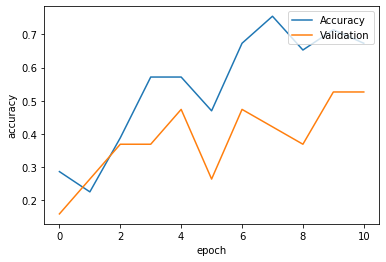

In [12]:
plt.plot(history2h.history['accuracy'])
plt.plot(history2h.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

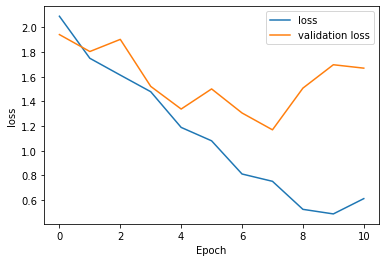

In [13]:
plt.plot(history2h.history['loss'])
plt.plot(history2h.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [14]:
net2h.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 6ms/step


[1.5585497617721558, 0.4117647111415863]

<h1>net2I</h1>

In [16]:
net2i = models.Sequential()
net2i.add(layers.Dense(480, input_shape = (480,6)))
net2i.add(layers.Dense (240, activation = 'relu'))
net2i.add(layers.Flatten())
net2i.add(layers.Dense(7, activation = 'sigmoid'))

net2i.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_11 (Dense)             (None, 480, 240)          115440    
_________________________________________________________________
flatten_3 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 806407    
Total params: 925,207
Trainable params: 925,207
Non-trainable params: 0
_________________________________________________________________


In [17]:
net2i.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2i = net2i.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 0s 9ms/step - loss: 1.8246 - accuracy: 0.2041 - val_loss: 2.5885 - val_accuracy: 0.0526
Epoch 2/11
49/49 [==============================] - 0s 4ms/step - loss: 2.0136 - accuracy: 0.2449 - val_loss: 2.1922 - val_accuracy: 0.0526
Epoch 3/11
49/49 [==============================] - 0s 4ms/step - loss: 1.7839 - accuracy: 0.3061 - val_loss: 1.6599 - val_accuracy: 0.2632
Epoch 4/11
49/49 [==============================] - 0s 4ms/step - loss: 1.4743 - accuracy: 0.3878 - val_loss: 1.4897 - val_accuracy: 0.4211
Epoch 5/11
49/49 [==============================] - 0s 4ms/step - loss: 1.3349 - accuracy: 0.5714 - val_loss: 1.2920 - val_accuracy: 0.2632
Epoch 6/11
49/49 [==============================] - 0s 4ms/step - loss: 1.0872 - accuracy: 0.4286 - val_loss: 1.3427 - val_accuracy: 0.2632
Epoch 7/11
49/49 [==============================] - 0s 4ms/step - loss: 0.9397 - accuracy: 0.5306 - val_loss: 1.4680

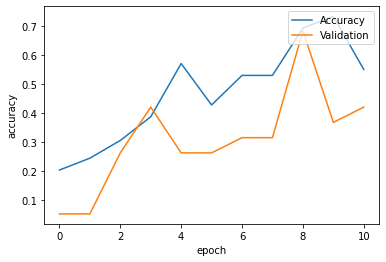

In [18]:
plt.plot(history2i.history['accuracy'])
plt.plot(history2i.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

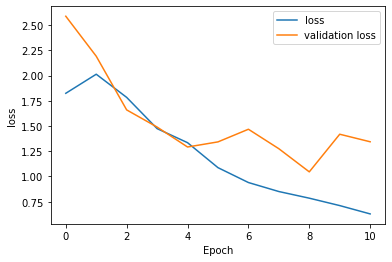

In [19]:
plt.plot(history2i.history['loss'])
plt.plot(history2i.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [20]:
net2i.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 2ms/step


[1.4065637588500977, 0.23529411852359772]

<h1>net2J</h1>

In [21]:
net2j = models.Sequential()
net2j.add(layers.Dense(480, input_shape = (480,6)))
net2j.add(layers.Dense (960, activation = 'relu'))
net2j.add(layers.Flatten())
net2j.add(layers.Dense(7, activation = 'sigmoid'))

net2j.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_14 (Dense)             (None, 480, 960)          461760    
_________________________________________________________________
flatten_4 (Flatten)          (None, 460800)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 3225607   
Total params: 3,690,727
Trainable params: 3,690,727
Non-trainable params: 0
_________________________________________________________________


In [22]:
net2j.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history2j = net2j.fit(train_data, train_labels, epochs = 11, validation_data = (val_data, val_labels))

Train on 49 samples, validate on 19 samples
Epoch 1/11
49/49 [==============================] - 1s 17ms/step - loss: 2.4384 - accuracy: 0.0204 - val_loss: 2.3112 - val_accuracy: 0.2105
Epoch 2/11
49/49 [==============================] - 1s 14ms/step - loss: 1.9157 - accuracy: 0.1837 - val_loss: 1.8783 - val_accuracy: 0.2105
Epoch 3/11
49/49 [==============================] - 1s 14ms/step - loss: 1.7401 - accuracy: 0.1633 - val_loss: 1.6334 - val_accuracy: 0.3158
Epoch 4/11
49/49 [==============================] - 1s 12ms/step - loss: 1.5178 - accuracy: 0.2245 - val_loss: 1.6547 - val_accuracy: 0.3684
Epoch 5/11
49/49 [==============================] - 1s 13ms/step - loss: 1.2954 - accuracy: 0.5102 - val_loss: 1.6231 - val_accuracy: 0.3158
Epoch 6/11
49/49 [==============================] - 1s 13ms/step - loss: 0.9601 - accuracy: 0.5918 - val_loss: 1.6352 - val_accuracy: 0.3158
Epoch 7/11
49/49 [==============================] - 1s 14ms/step - loss: 1.0610 - accuracy: 0.5306 - val_loss:

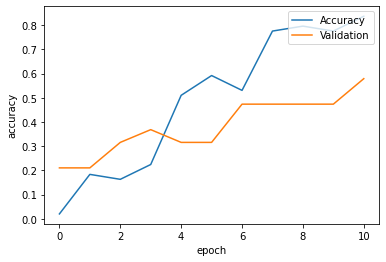

In [23]:
plt.plot(history2j.history['accuracy'])
plt.plot(history2j.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

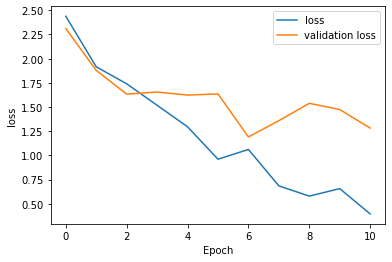

In [24]:
plt.plot(history2j.history['loss'])
plt.plot(history2j.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [25]:
net2j.evaluate(test_data, test_labels)

17/17 [==============================] - 0s 5ms/step


[0.9328606724739075, 0.529411792755127]